## CLASIFICADOR KNN ( K-nearest neighbours ) 

### Julian Ferres - Nro.Padrón 101483

## Enunciado

Se tienen $n$ puntos, de los cuales la mitad son de $clase$ $0$ y la restante mitad de $clase$ $1$

Utilizando la regla de los *k primeros vecinos* $(KNN)$

Clasificar algunos puntos ( generados con probabilidad uniforme ) de la región cuadrada $\left[-4;4\right] \times \left[-4;4\right]$ 

## Solución

In [38]:
#Import libraries
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
#Plots
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
n = 1000 #Tamaño de muestra

In [40]:
muestra = np.zeros((n,3))

#### Toma de muestra

In [41]:
mean1 = [-1, 0]
mean2 = [1, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x1, y1 = np.random.multivariate_normal(mean1, cov, int(n/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov, int(n/2)).T
clase = np.concatenate( (np.zeros(int(n/2)), np.ones(int(n/2))) )

In [42]:
normal_0 = np.column_stack((x1, y1))
normal_1 = np.column_stack((x2, y2))

### Puntos a clasificar

In [43]:
#Cantidad de puntos a clasificar
m=100000

In [44]:
x , y = np.random.uniform(-4,4,m) , np.random.uniform(-4,4,m)
test_points = np.column_stack(( x, y ))

In [45]:
test_points.shape

(100000, 2)

### Muestro los puntos con su envolvente convexa

In [46]:
hull = ConvexHull(test_points)
hull0 = ConvexHull(normal_0[:,:2])
hull1 = ConvexHull(normal_1[:,:2])

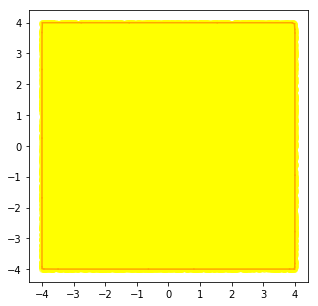

In [47]:
plt.figure(figsize = (5,5))
plt.scatter(test_points[:,0], test_points[:,1], color='yellow' , alpha = 0.5)
for simplex in hull.simplices:
    plt.plot(test_points[simplex, 0], test_points[simplex, 1], 'k-' , color = 'orange')

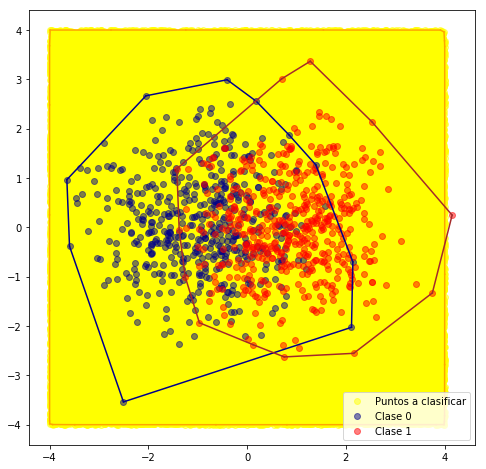

In [48]:
plt.figure(figsize=(8, 8))
plt.scatter( x, y, alpha=0.5 , color='yellow' ,  label = 'Puntos a clasificar');
for simplex in hull.simplices:
    plt.plot(test_points[simplex, 0], test_points[simplex, 1], 'k-' , color = 'orange');
    
plt.scatter( x1, y1, alpha='0.5', color='darkblue' ,  label = 'Clase 0');
for simplex in hull0.simplices:
    plt.plot(normal_0[simplex, 0], normal_0[simplex, 1], 'k-' , color = 'darkblue');
    
plt.scatter( x2, y2, alpha='0.5', color='red' , label = 'Clase 1');
for simplex in hull1.simplices:
    plt.plot(normal_1[simplex, 0], normal_1[simplex, 1], 'k-' , color = 'brown')

plt.legend()
plt.show()

## Clasificador KNN

In [50]:
muestra = np.concatenate((normal_0 , normal_1))

In [51]:
X = [[0,0], [1,0], [2,0], [3,0]]
y = [0, 1, 2, 3]
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(muestra, clase) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [52]:
output = np.zeros(m)
idx = 0
for i in test_points:
    output[idx] = (neigh.predict([i]))
    idx+=1

In [53]:
salida = pd.DataFrame({'xpoints' : test_points[:,0], 'ypoints' : test_points[:,1] , 'clase' : output})

In [54]:
idx0 = (salida['clase'] == 0 )
idx1 = (salida['clase'] == 1 )

clase_0 = salida.loc[idx0]
clase_1 = salida.loc[idx1]

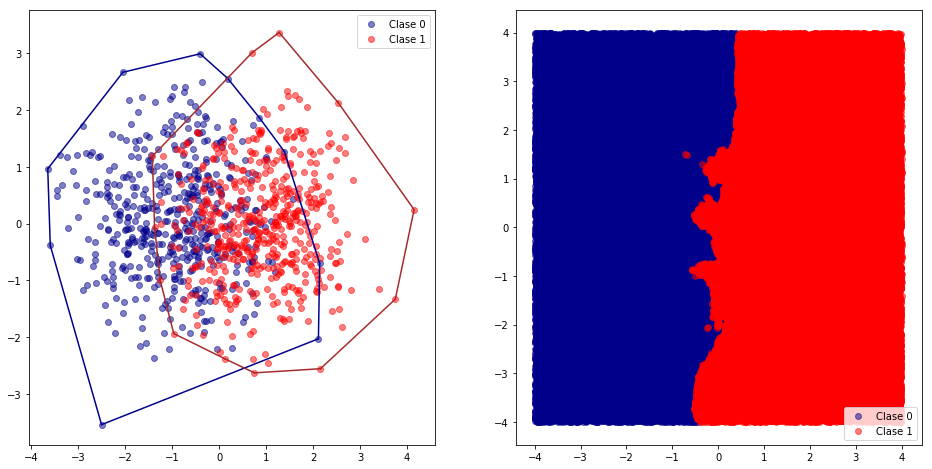

In [72]:
fig , ax = plt.subplots(ncols = 2 , figsize = (16,8))
ax[0].scatter( x1, y1, alpha='0.5', color='darkblue' ,  label = 'Clase 0');
for simplex in hull0.simplices:
    ax[0].plot(normal_0[simplex, 0], normal_0[simplex, 1], 'k-' , color = 'darkblue');
    
ax[0].scatter( x2, y2, alpha='0.5', color='red' , label = 'Clase 1');
for simplex in hull1.simplices:
    ax[0].plot(normal_1[simplex, 0], normal_1[simplex, 1], 'k-' , color = 'brown');
ax[0].legend()

ax[1].scatter( clase_0.xpoints , clase_0.ypoints , alpha='0.5', color='darkblue' ,  label = 'Clase 0');
ax[1].scatter( clase_1.xpoints , clase_1.ypoints , alpha='0.5', color='red' ,  label = 'Clase 1');
ax[1].legend()
plt.show()